In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [214]:
df = pd.read_csv("cardio_train.csv", delimiter=';', nrows=None)

In [215]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [216]:
df.shape

(70000, 13)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<Axes: xlabel='cardio'>

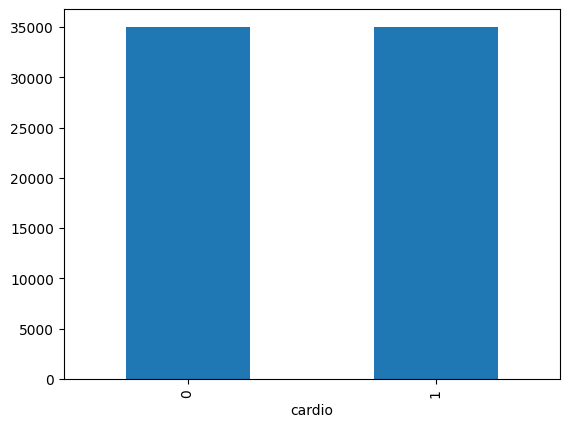

In [218]:
df['cardio'].value_counts().plot(kind="bar")

In [219]:
pd.crosstab(df.cardio, df.gender)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


In [220]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

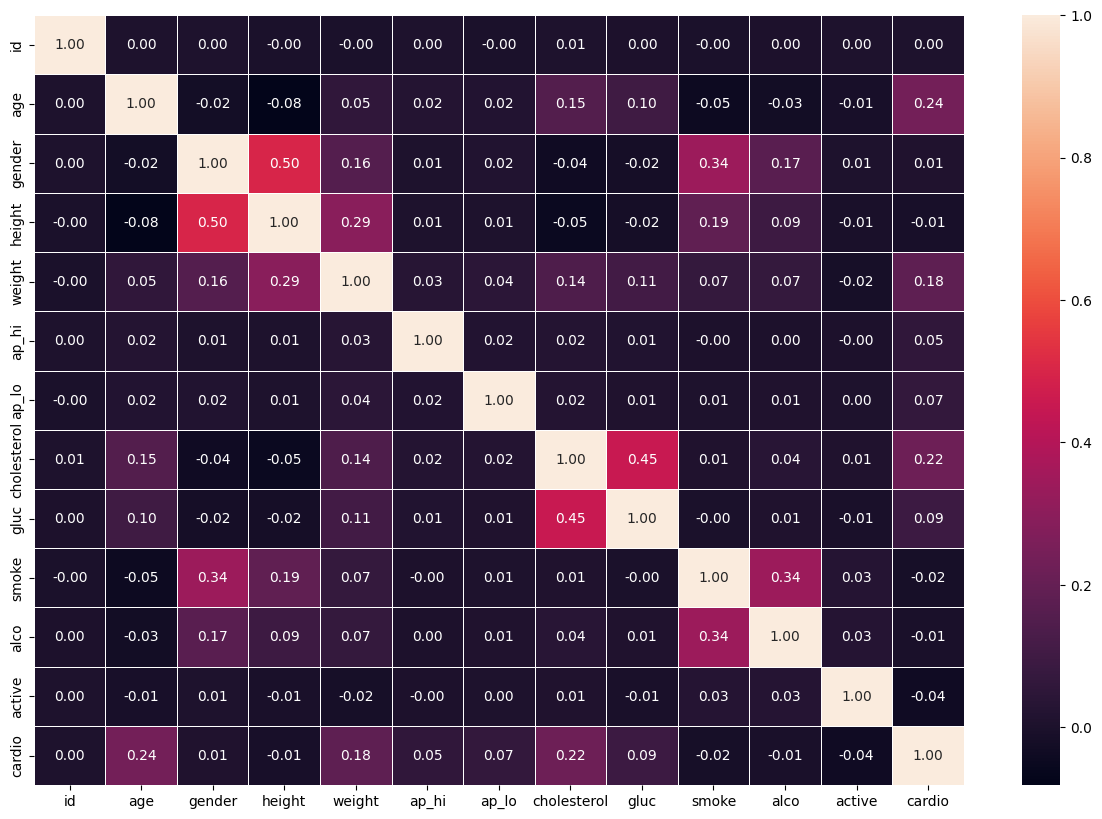

In [221]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f')

In [222]:
# unused_columns = ['id', 'gender', 'height']
# new_df = df[unused_columns]

In [223]:
new_df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years


In [224]:
# df.drop(['id', 'gender', 'height'], axis=1, inplace=True)

In [225]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [226]:
df[df['ap_hi'] > 1000].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1


In [227]:
df['age_in_years'] = (df['age'] / 365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [228]:
df.drop('age', axis=1, inplace=True)

In [229]:
df[df['ap_lo'] > 200].head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
228,314,2,183,98.0,160,1100,1,2,1,0,1,1,47
241,334,2,157,60.0,160,1000,2,1,0,0,0,1,60
260,357,1,150,83.0,140,800,1,1,0,0,1,1,49
329,458,1,176,63.0,160,1000,2,2,0,0,0,1,64
345,482,1,154,81.0,140,1000,2,1,0,0,1,1,51


In [230]:
new_df = df[(df['ap_hi'] < 300) & (df['ap_hi'] > 50)]

In [231]:
new_df.shape

(69772, 13)

<Axes: xlabel='ap_hi', ylabel='Density'>

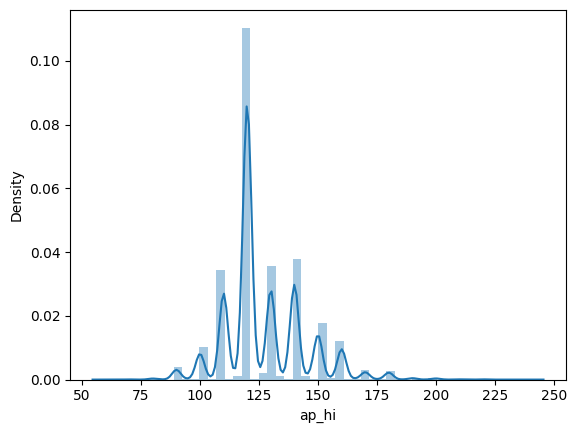

In [232]:
sns.distplot(new_df['ap_hi'])

<Axes: xlabel='ap_hi'>

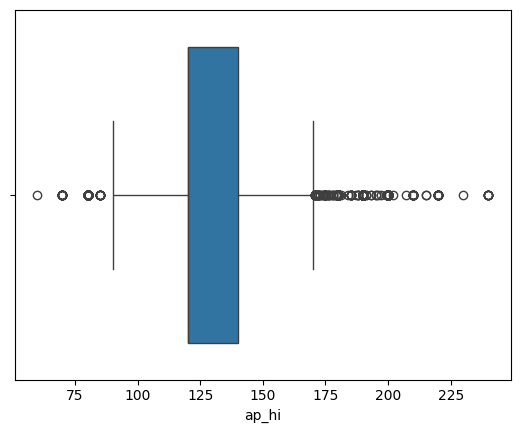

In [233]:
sns.boxplot(x=new_df['ap_hi'])

In [234]:
percent25_ap_hi = df['ap_hi'].quantile(0.25)
percent75_ap_hi = df['ap_hi'].quantile(0.75)

In [235]:
iqr_ap_hi = percent75_ap_hi - percent25_ap_hi
iqr_ap_hi

20.0

In [236]:
upper_ap_hi = percent75_ap_hi + 1.5*iqr_ap_hi
lower_ap_hi = percent25_ap_hi - 1.5*iqr_ap_hi
upper_ap_hi
lower_ap_hi

90.0

## Lets do capping

In [237]:
new_df['ap_hi'] = np.where(
new_df['ap_hi'] > upper_ap_hi,
upper_ap_hi,
np.where(new_df['ap_hi'] < lower_ap_hi,
        lower_ap_hi,
        new_df['ap_hi']))

<Axes: xlabel='ap_hi'>

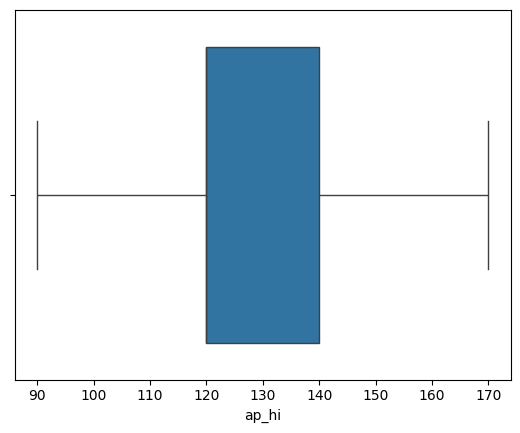

In [238]:
sns.boxplot(x=new_df['ap_hi'])

In [239]:
# new_df = new_df[new_df['ap_lo'] < 250]

In [240]:
new_df = new_df[new_df['ap_lo'] < 250]

<Axes: xlabel='ap_lo'>

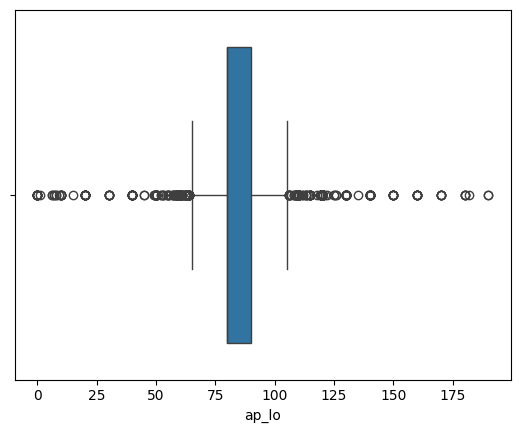

In [241]:
sns.boxplot(x=new_df['ap_lo'])

In [242]:
percent25_ap_lo = df['ap_lo'].quantile(0.25)
percent75_ap_lo = df['ap_lo'].quantile(0.75)

In [243]:
iqr_ap_lo = percent75_ap_lo - percent25_ap_lo
iqr_ap_lo

10.0

In [244]:
upper_ap_lo = percent75_ap_lo + 1.5*iqr_ap_lo
lower_ap_lo = percent25_ap_lo - 1.5*iqr_ap_lo
upper_ap_lo
lower_ap_lo

65.0

In [245]:
new_df['ap_lo'] = np.where(
new_df['ap_lo'] > upper_ap_lo,
upper_ap_lo,
np.where(new_df['ap_lo'] < lower_ap_lo,
        lower_ap_lo,
        new_df['ap_lo']))

<Axes: xlabel='ap_lo'>

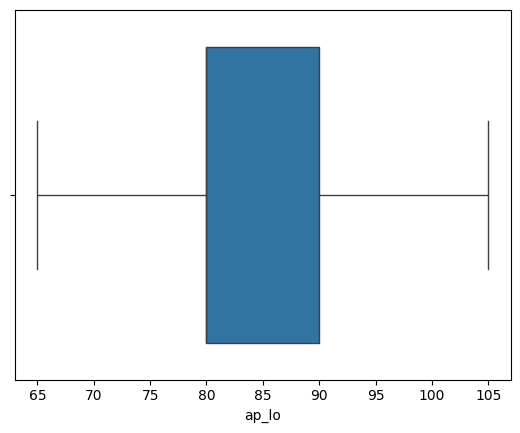

In [246]:
sns.boxplot(x=new_df['ap_lo'])

In [247]:
new_df.shape

(68822, 13)

In [248]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68822 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            68822 non-null  int64  
 1   gender        68822 non-null  int64  
 2   height        68822 non-null  int64  
 3   weight        68822 non-null  float64
 4   ap_hi         68822 non-null  float64
 5   ap_lo         68822 non-null  float64
 6   cholesterol   68822 non-null  int64  
 7   gluc          68822 non-null  int64  
 8   smoke         68822 non-null  int64  
 9   alco          68822 non-null  int64  
 10  active        68822 non-null  int64  
 11  cardio        68822 non-null  int64  
 12  age_in_years  68822 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 7.4 MB


<Axes: ylabel='Density'>

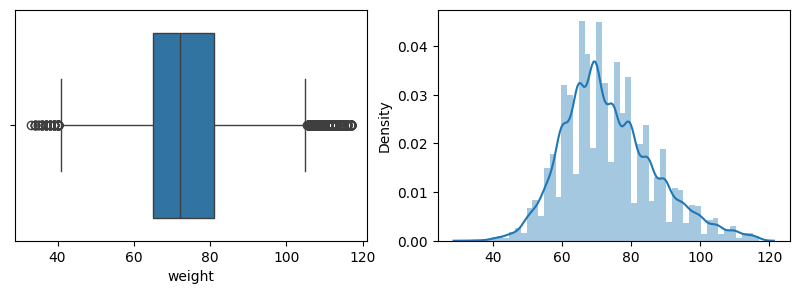

In [255]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['weight'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['weight'])

In [250]:
new_df[new_df['weight'] > 150].shape

(56, 13)

In [251]:
print("highest allowed", new_df['weight'].mean() + 3*new_df['weight'].std())
print("lowest allowed", new_df['weight'].mean() - 3*new_df['weight'].std())

highest allowed 117.11550230582941
lowest allowed 31.12623725419497


In [260]:
new_df[(new_df['weight'] > 118) | (new_df['weight'] < 32)].head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years


In [253]:
new_df = new_df[(new_df['weight'] < 118) & (new_df['weight'] > 32)]

In [254]:
new_df.shape

(68147, 13)

<Axes: ylabel='Density'>

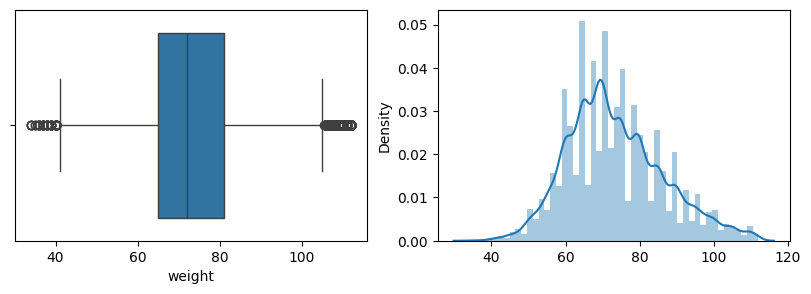

In [259]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['weight'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['weight'])

In [257]:
print("highest allowed", new_df['weight'].mean() + 3*new_df['weight'].std())
print("lowest allowed", new_df['weight'].mean() - 3*new_df['weight'].std())

highest allowed 113.24589908109425
lowest allowed 33.93109770526462


In [258]:
new_df = new_df[(new_df['weight'] < 113) & (new_df['weight'] > 33)]

In [267]:
new_df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,0,2,168,62.0,110.0,80.0,1,1,0,0,1,0,50,21
1,1,1,156,85.0,140.0,90.0,3,1,0,0,1,1,55,34
2,2,1,165,64.0,130.0,70.0,3,1,0,0,0,1,51,23
3,3,2,169,82.0,150.0,100.0,1,1,0,0,1,1,48,28
4,4,1,156,56.0,100.0,65.0,1,1,0,0,0,0,47,23


In [266]:
new_df['BMI'] = (new_df['weight'] / (new_df['height']/100)**2).astype(int)

In [272]:
new_df = new_df[new_df['BMI'] < 50]

<Axes: ylabel='Density'>

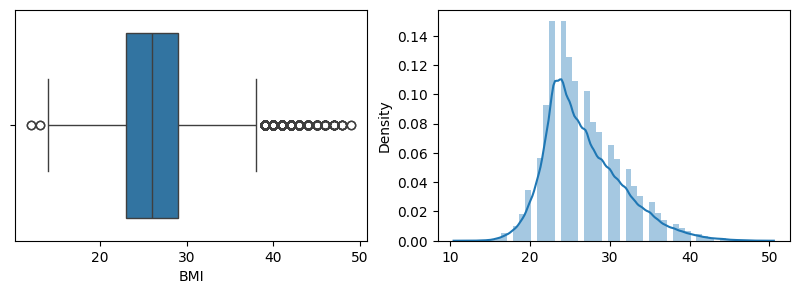

In [277]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['BMI'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['BMI'])

In [279]:
percent25_bmi = new_df['BMI'].quantile(0.25)
percent75_bmi = new_df['BMI'].quantile(0.75)

In [280]:
iqr_bmi = percent75_bmi - percent25_bmi
iqr_bmi

6.0

In [284]:
upper_bmi = percent75_bmi + 1.5*iqr_bmi
lower_bmi = percent25_bmi - 1.5*iqr_bmi
upper_bmi, lower_bmi

(38.0, 14.0)

In [285]:
new_df['BMI'] = np.where(
    new_df['BMI'] > upper_bmi,
    upper_bmi,
    np.where(
    new_df['BMI'] < lower_bmi,
    lower_bmi,
    new_df['BMI']))

<Axes: ylabel='Density'>

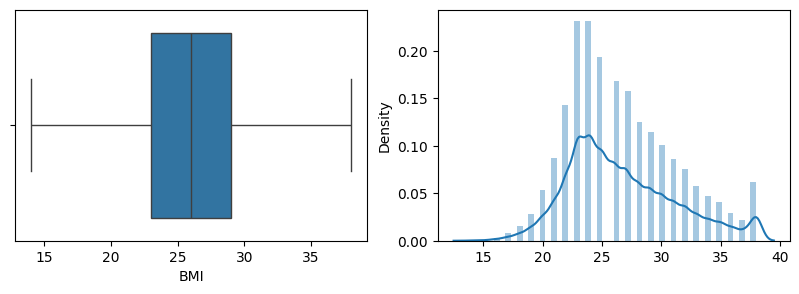

In [287]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['BMI'])

plt.subplot(1, 2, 2)
sns.distplot(x=new_df['BMI'])

In [288]:
unused_columns = ['id', 'gender', 'height']
unused_df = df[unused_columns]

In [289]:
new_df.drop(unused_columns, axis=1, inplace=True)

In [290]:
new_df

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,62.0,110.0,80.0,1,1,0,0,1,0,50,21.0
1,85.0,140.0,90.0,3,1,0,0,1,1,55,34.0
2,64.0,130.0,70.0,3,1,0,0,0,1,51,23.0
3,82.0,150.0,100.0,1,1,0,0,1,1,48,28.0
4,56.0,100.0,65.0,1,1,0,0,0,0,47,23.0
...,...,...,...,...,...,...,...,...,...,...,...
69994,80.0,150.0,80.0,1,1,0,0,1,1,57,29.0
69995,76.0,120.0,80.0,1,1,1,0,1,0,52,26.0
69997,105.0,170.0,90.0,3,1,0,1,0,1,52,31.0
69998,72.0,135.0,80.0,1,2,0,0,0,1,61,27.0


## Spliting data

In [319]:
x = new_df.drop("cardio", axis=1)
y = new_df['cardio']

In [320]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape

((47392, 10), (47392,))

In [321]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [322]:
# Now converting the scaled data into dataframe instead of numpy arra
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns) 

In [323]:
x_train_scaled.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,BMI
0,-0.802488,0.860799,0.991682,-0.531577,3.114325,3.239959,-0.238763,0.494904,1.054879,-1.010016
1,-0.879879,-1.021823,-1.318711,-0.531577,-0.393264,-0.308646,-0.238763,0.494904,-1.010270,-1.010016
2,-1.034661,-1.021823,-1.318711,-0.531577,-0.393264,3.239959,-0.238763,0.494904,0.464837,-1.880656
3,-0.338143,-0.394283,-0.163515,-0.531577,-0.393264,-0.308646,-0.238763,0.494904,-0.420227,-0.792356
4,2.138363,0.233258,-0.163515,-0.531577,-0.393264,-0.308646,-0.238763,0.494904,-1.305291,0.295944


In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [325]:
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
scores = fit_and_score(models, x_train_scaled, x_test_scaled, y_train, y_test)
scores

{'Logistic Regression': 0.7274383339077347,
 'KNN': 0.695288267441288,
 'Random Forest': 0.6979469253114076}

In [365]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
preds = model.predict(x_test_scaled)
accuracy_score(y_test, preds)


0.7274383339077347

In [382]:
preds[2]

1

In [369]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}
np.random.seed(42)

# Setup random hyperparamer search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train_scaled, y_train)
rs_log_reg

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [371]:
rs_log_reg.score(x_test_scaled, y_test)

0.7273890995027326

In [440]:
from scipy.special import expit
user_data = {
    "weight" : 32,
    "ap_hi" : 130,
    "ap_lo" : 70,
    "cholesterol" : 1,
    "gluc" : 1,
    "smoke" : 0,
    "alco" : 1,
    "active" : 1,
    "age_in_years" : 40,
    "BMI" : 35
}

# Convert to DataFrame
user_df = pd.DataFrame([user_data])

# Ensure the order of columns matches the training data
user_df = user_df[['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_in_years', 'BMI']]
user_df
user_df_scaled = scaler.transform(user_df)

# Predict probability
probabilities = rs_log_reg.decision_function(user_df_scaled)
print(expit(probabilities))

[0.24472959]


[0.5023658]


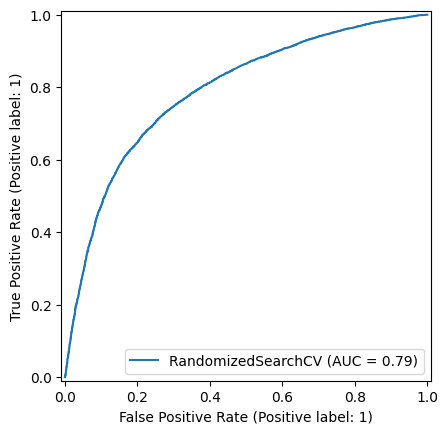

In [379]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=rs_log_reg, X=x_test_scaled, y=y_test);